##### (a) Let the standard deviation of your income process be $\sigma$ = 0.13, let the persistence be $\rho$ = 0:4, let the long-run growth rate of income be g = 0:025, and let average initial income be $inc_0$ = $\$$80000. Assume you will work for 40 years after you graduate (2020 to 2059). Simulate 10,000 different realizations of your lifetime income. Do this by first drawing 10,000 sets of 40 normally distributed errors with mean 0 and standard deviation $\sigma$ = 0.13. Then plug those into the income process (1) to simulate your lifetime income. Plot one of the lifetime income paths. Make sure your axes are correctly labeled and your plot has a title.

In [28]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [14]:
def income_sim(p):
    """
    p = {    
        'inc0'        : 80000,      #starting income
        'g'           : 0.025,       #growth rate
        'st_year'     : int(2018),  #start year
        'work_years'  : 40,         #years to work
        'rho'         : 0.4,        #persistence
        'sigma'       : 0.13,       #standard deviation of the log normal distribution
        'num_draws'   : 10000       #simulations
    }
    """  
    ln_errors_mat = np.zeros((p['num_draws'],p['work_years']))
    for draw in range(p['num_draws']):
        inc_errors = np.random.lognormal(0, p['sigma'], p['work_years'])
        ln_errors_mat[draw, :] = np.log(inc_errors)
    ln_errors_mat = np.transpose(ln_errors_mat)
    #create the matrix (working years * simulation times)
    ln_inc_mat = np.zeros((p['work_years'], p['num_draws']))
    
    #initialize the matrix
    ln_inc0 = np.log(p['inc0'])
    ln_inc_mat[0, :] = ln_inc0 + ln_errors_mat[0, :]

    #loop and apply model
    for yr in range(1, p['work_years']):
        ln_inc_mat[yr, :] = (1-p['rho'])*(ln_inc0+p['g']*yr) + p['rho']*ln_inc_mat[yr-1,:]+ln_errors_mat[yr, :]
    
    inc_mat = np.exp(ln_inc_mat)
    return inc_mat

In [35]:
p = {    
        'inc0'        : 80000,      #starting income
        'g'           : 0.025,       #growth rate
        'st_year'     : int(2020),  #start year
        'work_years'  : 40,         #years to work
        'rho'         : 0.4,        #persistence
        'sigma'       : 0.13,       #standard deviation of the log normal distribution
        'num_draws'   : 10000       #simulations
    }

inc_mat = income_sim(p)

Text(0, 0.5, 'Annual wealth (\\$s)')

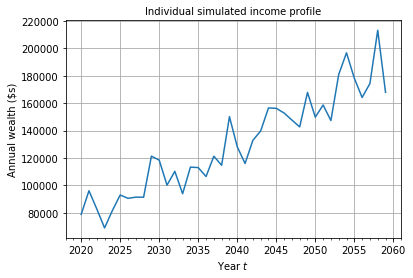

In [91]:
rand_draw = np.random.randint(0, p['num_draws']+1)
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, rand_draw])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated income profile', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual wealth (\$s)')

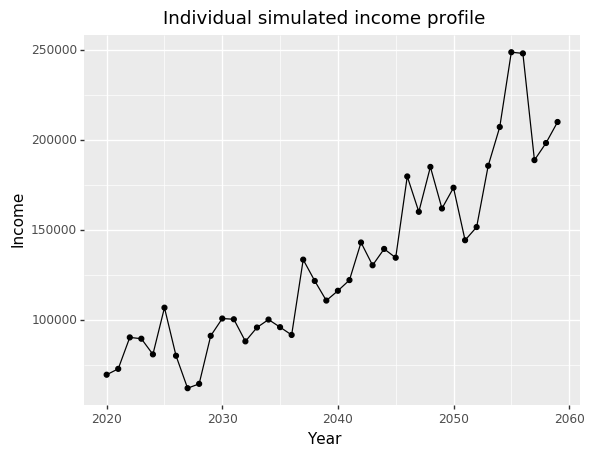

<ggplot: (21468957)>

In [90]:
#This is a second approach
rand_draw = np.random.randint(0, p['num_draws']+1)
years = np.arange(p['st_year'], p['st_year'] + p['work_years'])
df = np.transpose([np.transpose(years), inc_mat[:, rand_draw]])
inc_data = pd.DataFrame(df, columns = ['year', 'income'])

(ggplot(inc_data, aes(x='year', y ='income' ))
 + geom_point()
 + geom_line()
 + ggtitle("Individual simulated income profile")
 + xlab("Year")
 +ylab("Income")
)

##### (b) Plot a histogram with 50 bins of year t = 2020 initial income for each of the 10,000 simulations. What percent of your class will earn more than 100,000 in the first year out of the program? What percent of the class will earn less than 70,000? Is the distribution normally distributed (i.e., symmetric and bell curved)?

4.35% of the class will earn more than 100000 in the first year
14.58% of the class will earn less than 70000 in the first year
DescribeResult(nobs=10000, minmax=(50820.304834035196, 126547.14099546317), mean=80826.80599091838, variance=109085346.41922355, skewness=0.40937744790457303, kurtosis=0.23326622984530765)


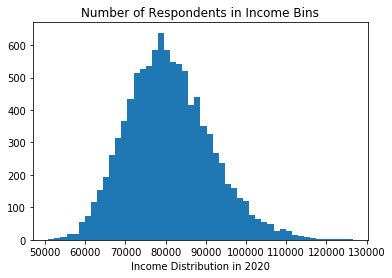

In [128]:
inc_2020 = inc_mat[0, :]
plt.hist(inc_2020, bins=50)
plt.xlabel("Income Distribution in 2020")
plt.title("Number of Respondents in Income Bins")
perct1 = len(list(filter(lambda x: x>100000, inc_2020)))/p['num_draws']*100
perct2 = len(list(filter(lambda x: x<70000, inc_2020)))/p['num_draws']*100
print("%4.2f%% of the class will earn more than 100000 in the first year"%(perct1))
print("%4.2f%% of the class will earn less than 70000 in the first year"%(perct2))
from scipy import stats
print(stats.describe(inc_2020))

From the histogram plot, we can observe that the distribution of individual income in 2020 almost fits into normal distribution. The descriptive statistics suggest that it's positive skewed, i.e., the distribution has a fatter tail at the lower bins. However, the difference is not very large, as excess kurtosis is only 0.233 (supposed to be 0).

##### (c) Suppose you graduate from the MACSS program with \$95,000 of zero-interest debt. You will use 10\% of your annual salary after you graduate to pay off this loan. Plot the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations. This histogram will only have as many bins as you have unique years in which people pay off their debt. In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2029)?

In 77.15% the simulation, the loan could be paid off in 10 years


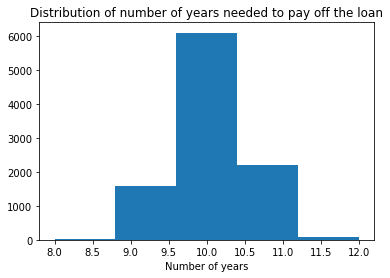

In [135]:
clear_years = []
for i in range(p['num_draws']):
    count = 0
    paid = 0
    inc_profile = inc_mat[:, i]
    for inc in inc_profile:
        paid += inc * 0.1
        if paid < 95000:
            count = count+1
        else:
            break
    clear_years.append(count)
bins = len(set(clear_years))
clear_years = np.asarray(clear_years)
plt.hist(clear_years, bins)
plt.xlabel("Number of years")
plt.title("Distribution of number of years needed to pay off the loan")
perct3 = len(list(filter(lambda x: x<=10, clear_years)))/p['num_draws']*100
print("In %4.2f%% the simulation, the loan could be paid off in 10 years"%(perct3))

##### (d) Now suppose that the Chicago MACSS program becomes very well known in the next two years, and the skills you are learning are demanded more by employers. This increases the average starting salary to $inc_0$ = $\$$90000, but the standard deviation in incomes increases also to $\sigma$ = 0.17. Plot the new histogram of how many years it takes to pay off your loan of $\$$95,000 in your new 10,000 simulations with the new standard deviation and the new average initial salary. In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2029)? 

With the new average initial wage and standard deviation, in 98.10% the simulation the loan could be paid off in 10 years


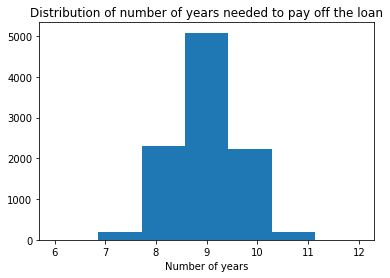

In [140]:
p_new = {    
        'inc0'        : 90000,      #starting income
        'g'           : 0.025,       #growth rate
        'st_year'     : int(2020),  #start year
        'work_years'  : 40,         #years to work
        'rho'         : 0.4,        #persistence
        'sigma'       : 0.17,       #standard deviation of the log normal distribution
        'num_draws'   : 10000       #simulations
    }
inc_mat_new = income_sim(p_new)
clear_years_new = []
for i in range(p_new['num_draws']):
    count = 0
    paid = 0
    inc_profile = inc_mat_new[:, i]
    for inc in inc_profile:
        paid += inc * 0.1
        if paid < 95000:
            count = count+1
        else:
            break
    clear_years_new.append(count)
bins = len(set(clear_years_new))
clear_years = np.asarray(clear_years_new)
plt.hist(clear_years_new, bins)
plt.xlabel("Number of years")
plt.title("Distribution of number of years needed to pay off the loan")
perct4 = len(list(filter(lambda x: x<=10, clear_years_new)))/p['num_draws']*100
print("With the new average initial wage and standard deviation, in %4.2f%% the simulation the loan could be paid off in 10 years"%(perct4))